# Import the cifar10 dataset from ‘keras.datasets’. Perform all the data preprocessing required.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout

In [2]:
cifar_10 = keras.datasets.cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar_10.load_data()

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
train_labels.shape

(50000, 1)

In [7]:
train_labels[1]

array([9], dtype=uint8)

In [8]:
train_images[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
# converting labels from 2d array to 1d
train_labels=train_labels.reshape(-1,)

In [10]:
train_labels[0]

6

In [11]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

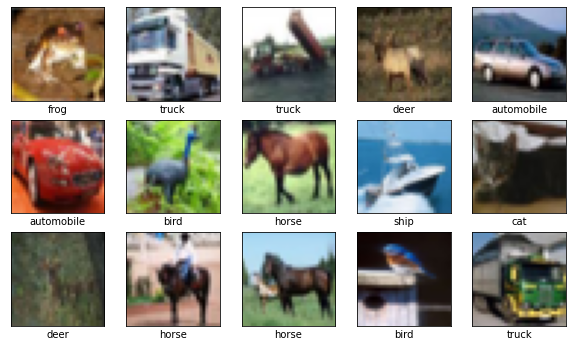

In [12]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

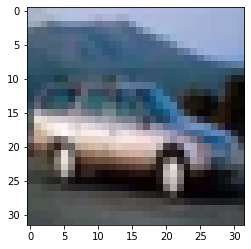

In [13]:
plt.imshow(train_images[4])

### normalizing the data

In [14]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

# ANN model

In [15]:
## ANN model
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(30, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy'
              )

# CNN model

In [17]:
# cnn model
conv1 = layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32,32,3) )
conv2 = layers.Conv2D(64, (3,3), activation='relu')
conv3 = layers.Conv2D(128, (3,3), activation='relu')
max_pool_1 = layers.MaxPooling2D((2,2))
max_pool_2 = layers.MaxPooling2D((2,2))
max_pool_3 = layers.MaxPooling2D((2,2))
flat_layer = layers.Flatten()
fc = layers.Dense(128, activation='relu')
output = layers.Dense(10, 'softmax')

model = models.Sequential()

model.add(conv1)
model.add(max_pool_1)
model.add(Dropout(0.5))

model.add(conv2)
model.add(max_pool_2)
model.add(Dropout(0.2))

model.add(conv3)
model.add(max_pool_3)

model.add(flat_layer)
model.add(fc)
model.add(output)



In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Fit and evaluate the model. Plot the training and validation curves.

In [19]:
## fitting ann model
ann.fit(train_images_norm, train_labels, epochs=20,
        validation_data = (test_images_norm, test_labels), verbose=1)

Epoch 1/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.1672 - val_loss: 1.9601
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9195 - val_loss: 1.8039
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7883 - val_loss: 1.7753
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7293 - val_loss: 1.7725
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6885 - val_loss: 1.6837
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6569 - val_loss: 1.6387
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6204 - val_loss: 1.6658
Epoch 8/20
1563/1563 [==============================] - 2s 2ms/step - loss: 1.5995 - val_loss: 1.6559
Epoch 9/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5979 - val_loss: 1.7631
Epoch 10/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.581

<AxesSubplot:>

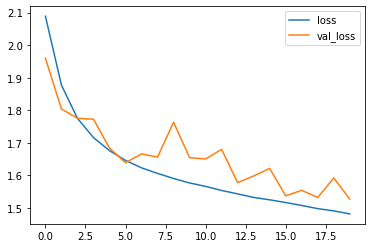

In [20]:
model_loss = pd.DataFrame(ann.history.history)
model_loss.plot()

In [21]:
# fitting cnn model
cnn = model.fit(train_images_norm, train_labels,
                epochs=10, batch_size=20,
                shuffle=True, validation_split = 0.1)

Epoch 1/10
2250/2250 [==============================] - 52s 23ms/step - loss: 1.8049 - accuracy: 0.3294 - val_loss: 1.2971 - val_accuracy: 0.5440
Epoch 2/10
2250/2250 [==============================] - 48s 21ms/step - loss: 1.2847 - accuracy: 0.5364 - val_loss: 1.1089 - val_accuracy: 0.6048
Epoch 3/10
2250/2250 [==============================] - 47s 21ms/step - loss: 1.1428 - accuracy: 0.5936 - val_loss: 1.0215 - val_accuracy: 0.6438
Epoch 4/10
2250/2250 [==============================] - 48s 21ms/step - loss: 1.0589 - accuracy: 0.6254 - val_loss: 0.9767 - val_accuracy: 0.6596
Epoch 5/10
2250/2250 [==============================] - 47s 21ms/step - loss: 0.9995 - accuracy: 0.6494 - val_loss: 0.9523 - val_accuracy: 0.6718
Epoch 6/10
2250/2250 [==============================] - 47s 21ms/step - loss: 0.9598 - accuracy: 0.6602 - val_loss: 0.9083 - val_accuracy: 0.6874
Epoch 7/10
2250/2250 [==============================] - 49s 22ms/step - loss: 0.9210 - accuracy: 0.6762 - val_loss: 0.9186 -

In [22]:
test_loss, test_accuracy = model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.8962 - accuracy: 0.6914


In [29]:
print(test_accuracy)

0.6913999915122986


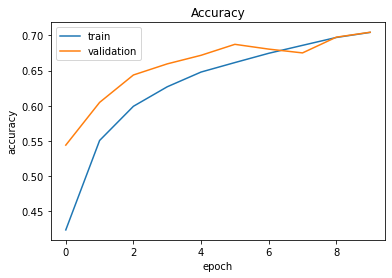

In [30]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'validation'], loc='upper left')
plt.show()